In [ ]:
# default_exp analysis

# Tools to analyze the results of Gate simulations

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
import uproot as rt
from scipy.stats import moyal
import awkward as ak
import pandas as pd

def get_edep_data(root_file_name):
    edep = pd.Series(dtype='float64')
    with rt.open(root_file_name) as root_file:
        tree = root_file['Hits;11']
        df = ak.to_pandas(tree.arrays())
        df_vID3 = df[df.volumeID == 3]
        edep = df_vID3.groupby(['eventID'])['edep'].sum()*1000
    return edep

In [ ]:
edep = get_edep_data('/Users/hits/Downloads/TrackerHits.root')

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_macro_tools.ipynb.
Converted 01_analysis.ipynb.
Converted 02_scanners.ipynb.
Converted index.ipynb.


In [ ]:
loc,scale =  moyal.fit(edep)
print(loc, scale)

31.21577349933282 55.7683201223829


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


In [ ]:
plt.figure()

<ipython-input-148-8412bcfafa05>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return pylandau.landau_pdf(np.float64(x))
<ipython-input-148-8412bcfafa05>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return pylandau.landau_pdf(np.float64(x))


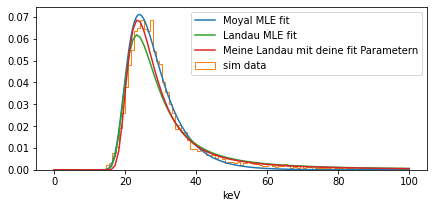

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig1, ax1 = plt.subplots(figsize=(7, 3))
x1 = np.linspace(0, 100, 200)
ax1.plot(x1, moyal.pdf(x1, loc, scale), label = 'Moyal MLE fit')
_ = ax1.hist(edep[edep < 100], bins = 100, histtype='step', density= True, label = 'sim data')
ax1.plot(x, landau.pdf(x, 23.973851592546183, 2.921658875656049), label='Landau MLE fit')
ax1.plot(x, landau.pdf(x, 24.13, 2.629), label='Meine Landau mit deine fit Parametern')
#ax1.scatter(GeV8_data.energy, GeV8_data.counts/4400, label = 'data', marker='o',  c = 'green', alpha = 0.5)
plt.xlabel('keV')
ax1.legend()

<ipython-input-148-8412bcfafa05>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return pylandau.landau_pdf(np.float64(x))


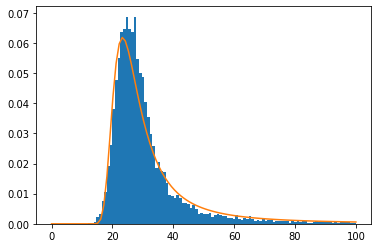

In [ ]:
array_hist = plt.hist(edep[edep<100], bins = 100, density=True)
x = np.linspace(0, 100, num=100)
plt.plot(x, landau.pdf(x, 23.973851592546183, 2.921658875656049))
#plt.plot(x, pylandau.landau_pdf(x, 23.973851592546183, 2.9216588756560493))

In [ ]:
landau.pdf(x, loc=5, scale=0.9)

using landau._pdf: 24.01278866991769, 3.401363731100145


<ipython-input-141-a1aeeedbd202>:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return pylandau.landau_pdf(np.float64(x))


array([2.03606121e-41, 8.70840164e-14, 5.90252112e-05, 3.04895474e-02,
       1.62109653e-01, 1.97659810e-01, 1.52935324e-01, 1.05046457e-01,
       7.14973205e-02, 4.98820671e-02, 3.59582583e-02, 2.67636720e-02,
       2.05001885e-02, 1.60995965e-02, 1.29185706e-02, 1.05597739e-02,
       8.77076673e-03, 7.38662264e-03, 6.29671727e-03, 5.42502790e-03,
       4.71814163e-03, 4.13776872e-03, 3.65595491e-03, 3.25195024e-03,
       2.91011808e-03, 2.61851170e-03, 2.36788784e-03, 2.15101191e-03,
       1.96216106e-03, 1.79676377e-03, 1.65113507e-03, 1.52227965e-03,
       1.40774374e-03, 1.30550265e-03, 1.21387440e-03, 1.13145287e-03,
       1.05705559e-03, 9.89682663e-04, 9.28484121e-04, 8.72733925e-04,
       8.21809008e-04, 7.75172330e-04, 7.32359085e-04, 6.92965408e-04,
       6.56639080e-04, 6.23071839e-04, 5.91992988e-04, 5.63164058e-04,
       5.36374331e-04, 5.11437069e-04, 4.88186328e-04, 4.66474251e-04,
       4.46168758e-04, 4.27151583e-04, 4.09316577e-04, 3.92568257e-04,
      

In [ ]:
import math

def find_max_nonzero(array_hist):
    previous = -1
    preprevious  = -1
    p_b = -1
    pp_b = -1
    for v, b in zip(array_hist[0],array_hist[1]):
        if preprevious != 0 and previous == 0 and v == 0:
            return math.ceil(p_b)
        pp_b = p_b
        p_b = b
        preprevious = previous
        previous = v
    

In [ ]:
def find_range(param):
    array_hist = plt.hist(param, bins=100)
    upper_limit = find_max_nonzero(array_hist)
    ret = -1
    while upper_limit:
        ret = upper_limit
        array_hist = plt.hist(param[param < upper_limit], bins=100)
        upper_limit = find_max_nonzero(array_hist)
    return ret

In [ ]:
loc,scale =  moyal.fit(edep[edep < 50])
print(loc, scale)

24.01278866991769 3.401363731100145


In [ ]:
from scipy.stats import rv_continuous
import pylandau

class landau_gen(rv_continuous):
    r"""A Landau continuous random variable.
    %(before_notes)s
    Notes
    -----
    The probability density function for `Landau` is:
    
    for a real number :math:`x`.
    %(after_notes)s
    This distribution has utility in high-energy physics and radiation
    detection. It describes the energy loss of a charged relativistic
    particle due to ionization of the medium . 
    """
    
    def _pdf(self, x):
        return pylandau.landau_pdf(np.float64(x))


landau = landau_gen(name="landau")

<ipython-input-81-4ae955ebf56b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(x, pylandau.landau_pdf(x, 10, 1))
<ipython-input-81-4ae955ebf56b>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(x, pylandau.langau_pdf(x, 10, 1, 1))


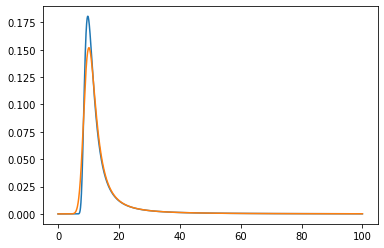

In [ ]:
x = np.arange(0, 100, 0.01)
plt.plot(x, pylandau.landau_pdf(x, 25, 1))
plt.plot(x, pylandau.langau_pdf(x, 10, 1, 1))

In [ ]:
landau.fit(edep[edep<300], loc=24, scale=3)

<ipython-input-148-8412bcfafa05>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return pylandau.landau_pdf(np.float64(x))


(23.973851592546183, 2.921658875656049)

In [ ]:
pylandau.landau_pdf(np.double(edep[edep<100].ravel()), 25, 3)

<ipython-input-100-51e2a1dfb0dd>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pylandau.landau_pdf(np.double(edep.ravel()), 25, 3)


array([0.01636874, 0.06020496, 0.02633273, ..., 0.00437727, 0.03628851,
       0.04931879])

In [ ]:
from scipy import stats

m = np.mean(edep)
em = stats.sem(edep)
tm = stats.tmean(edep, limits=(edep.min(),np.mean(edep) + 1 * np.std(edep) + 2))
etm = stats.tsem(edep, limits=(edep.min(),np.mean(edep) + 1 * np.std(edep) + 2))
print(f'Mean:        {m},       Error on mean: {em}, SNR: {m/em}')
print(f'Trimmed mean {tm}, Error on trimmed mean: {etm}, SNR: {tm/etm}')
#print(stats.mode(np.round(edep, 0)))


Mean:        35.96607971191406,       Error on mean: 1.420998077392578, SNR: 25.310435168152406
Trimmed mean 32.43781762604408, Error on trimmed mean: 0.1832643962128964, SNR: 177.00010638379206


In [ ]:
## edep.to_csv('simdata.csv', sep =',', mode='w')

In [ ]:
edep.max()

11505.376

In [ ]:
pylandau.landau_pdf(x, 24.13, 2.629)

<ipython-input-126-95a121a27612>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pylandau.landau_pdf(x, 24.13, 2.629)


array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 8.25889161e-227, 1.34780633e-154, 1.90019432e-105,
       5.27292526e-072, 2.94998040e-049, 8.59276748e-034, 2.74499957e-023,
       3.67584377e-016, 2.46671285e-011, 4.49399540e-008, 7.02476843e-006,
       2.06279939e-004, 1.94049481e-003, 8.41205077e-003, 2.15284093e-002,
       3.85098825e-002, 5.40242203e-002, 6.42961389e-002, 6.84963187e-002,
       6.77591187e-002, 6.38245424e-002, 5.82359168e-002, 5.20820639e-002,
       4.60231375e-002, 4.04056251e-002, 3.53758412e-002, 3.09645161e-002,
       2.71419989e-002, 2.38513694e-002, 2.10269876e-002, 1.86041475e-002,
       1.65235880e-002, 1.47331721e-002, 1.31880926e-002, 1.18503746e-002,
       1.06880931e-002, 9.67452558e-003, 8.78734489e-003, 8.00789892e-003,
       7.32058914e-003, 6.71234628e-003, 6.17219361e-003, 5.69088591e-003,
       5.26061243e-003, 4.87475302e-003, 4.52767803e-003, 4.21458407e-003,
       3.93135892e-003, 3